In [35]:
import sqlite3, pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("data/processed/warehouse.db")

# List all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
print(tables)


Tables in warehouse.db:
     name
0  orders


In [36]:
import sqlite3, pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("data/processed/warehouse.db")

# List all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
print(tables)


Tables in warehouse.db:
     name
0  orders


In [37]:
cd /c/Users/whois/Downloads/PROGRAMMING/data-science-portfolio


[WinError 3] The system cannot find the path specified: '/c/Users/whois/Downloads/PROGRAMMING/data-science-portfolio'
c:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics


In [38]:
from pathlib import Path
import sqlite3, pandas as pd

# Build the exact path to your database file
db_path = Path(r"C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db")
print("DB exists?", db_path.exists(), "\nPath:", db_path)

# Connect and list tables
conn = sqlite3.connect(db_path)
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
print(tables)


DB exists? True 
Path: C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db
Tables in warehouse.db:
     name
0  orders


In [39]:
from pathlib import Path
print("CWD:", Path.cwd())
print("Expect DB here:", Path.cwd() / "data" / "processed" / "warehouse.db")


CWD: c:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics
Expect DB here: c:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db


In [40]:
import sqlite3, pandas as pd
from pathlib import Path

# Path to your SQLite DB
db_path = Path(r"C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db")

# Connect
conn = sqlite3.connect(db_path)

# List tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
print(tables)



Tables in warehouse.db:
     name
0  orders


In [41]:
df = pd.read_sql("SELECT * FROM your_table_name LIMIT 5;", conn)
df
query = """
SELECT customer_id, COUNT(*) as num_orders, SUM(amount) as total_spent
FROM orders
GROUP BY customer_id
ORDER BY total_spent DESC
LIMIT 10;
"""

top_customers = pd.read_sql(query, conn)
top_customers




DatabaseError: Execution failed on sql 'SELECT * FROM your_table_name LIMIT 5;': no such table: your_table_name

In [ ]:
import os, sqlite3, pandas as pd
from pathlib import Path

print("CWD:", os.getcwd())  # where the notebook is running

db_path = Path(r"C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db")
print("DB exists:", db_path.exists(), "->", db_path)

conn = sqlite3.connect(db_path)
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables


CWD: c:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics
DB exists: True -> C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\data\processed\warehouse.db


,name


In [ ]:
alt_conn = sqlite3.connect(r"C:\Users\whois\Downloads\PROGRAMMING\data-science-portfolio\02-sql-analytics\analytics.db")
alt_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", alt_conn)
alt_tables


,name


In [ ]:
import sqlite3, pandas as pd

conn = sqlite3.connect("data/processed/warehouse.db")
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables



,name


In [ ]:
import sqlite3, pandas as pd

# Connect to the SQLite DB you just built
conn = sqlite3.connect("data/processed/warehouse.db")

# List all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
display(tables)


Tables in warehouse.db:


,name


In [ ]:
pd.read_sql("SELECT * FROM orders LIMIT 5;", conn)


DatabaseError: Execution failed on sql 'SELECT * FROM orders LIMIT 5;': no such table: orders

In [ ]:
# 1) Total revenue
pd.read_sql("""
    SELECT SUM(amount) AS total_revenue
    FROM orders;
""", conn)

# 2) Top 10 customers by spend
pd.read_sql("""
    SELECT customer_id, COUNT(*) AS num_orders, SUM(amount) AS total_spent
    FROM orders
    GROUP BY customer_id
    ORDER BY total_spent DESC
    LIMIT 10;
""", conn)

# 3) Monthly revenue trend
pd.read_sql("""
    SELECT strftime('%Y-%m', order_date) AS month, SUM(amount) AS revenue
    FROM orders
    GROUP BY month
    ORDER BY month;
""", conn)


DatabaseError: Execution failed on sql '
    SELECT SUM(amount) AS total_revenue
    FROM orders;
': no such table: orders

In [ ]:
import sqlite3, pandas as pd

conn = sqlite3.connect("data/processed/warehouse.db")

# Show all tables in the DB
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in warehouse.db:")
display(tables)



Tables in warehouse.db:


,name


In [ ]:
import sqlite3

conn = sqlite3.connect("data/processed/warehouse.db")
cur = conn.cursor()

# Example table schema
cur.execute("""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date TEXT,
    amount REAL
);
""")

conn.commit()


In [ ]:
import pandas as pd

df = pd.read_csv("data/raw/orders.csv")
df.to_sql("orders", conn, if_exists="replace", index=False)

print("Loaded", len(df), "rows into orders")


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/orders.csv'

In [ ]:
import pandas as pd

data = {
    "order_id": [1, 2, 3, 4, 5],
    "customer_id": [101, 102, 101, 103, 104],
    "order_date": ["2025-08-01", "2025-08-01", "2025-08-02", "2025-08-03", "2025-08-03"],
    "amount": [50.0, 75.5, 20.0, 100.0, 60.0]
}
df = pd.DataFrame(data)

conn = sqlite3.connect("data/processed/warehouse.db")
df.to_sql("orders", conn, if_exists="replace", index=False)

print("Created demo table with 5 rows")


Created demo table with 5 rows


In [ ]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("data/processed/warehouse.db")

# Dummy data for orders table
data = {
    "order_id": [1, 2, 3, 4, 5],
    "customer_id": [101, 102, 101, 103, 104],
    "order_date": ["2025-08-01", "2025-08-01", "2025-08-02", "2025-08-03", "2025-08-03"],
    "amount": [50.0, 75.5, 20.0, 100.0, 60.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save into SQLite as table 'orders'
df.to_sql("orders", conn, if_exists="replace", index=False)

print("Created dummy 'orders' table with", len(df), "rows")


Created dummy 'orders' table with 5 rows


In [ ]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


     name
0  orders


In [ ]:
pd.read_sql("SELECT * FROM orders LIMIT 5;", conn)


,order_id,customer_id,order_date,amount
0,1,101,2025-08-01,50.0
1,2,102,2025-08-01,75.5
2,3,101,2025-08-02,20.0
3,4,103,2025-08-03,100.0
4,5,104,2025-08-03,60.0


In [ ]:
pd.read_sql("SELECT SUM(amount) AS total_revenue FROM orders;", conn)



,total_revenue
0,305.5


In [ ]:
import sqlite3, pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("data/processed/warehouse.db")

# 1) Total revenue
total_revenue = pd.read_sql("""
    SELECT SUM(amount) AS total_revenue
    FROM orders;
""", conn)
print("Total revenue:")
display(total_revenue)

# 2) Top 2 customers by spend
top_customers = pd.read_sql("""
    SELECT customer_id,
           COUNT(*) AS num_orders,
           SUM(amount) AS total_spent
    FROM orders
    GROUP BY customer_id
    ORDER BY total_spent DESC
    LIMIT 2;
""", conn)
print("Top 2 customers by spend:")
display(top_customers)

# 3) Monthly revenue trend (if order_date column exists)
monthly_revenue = pd.read_sql("""
    SELECT strftime('%Y-%m', order_date) AS month,
           SUM(amount) AS revenue
    FROM orders
    GROUP BY month
    ORDER BY month;
""", conn)
print("Monthly revenue trend:")
display(monthly_revenue)


Total revenue:


,total_revenue
0,305.5


Top 2 customers by spend:


,customer_id,num_orders,total_spent
0,103,1,100.0
1,102,1,75.5


Monthly revenue trend:


,month,revenue
0,2025-08,305.5


Total Revenue: 305.5


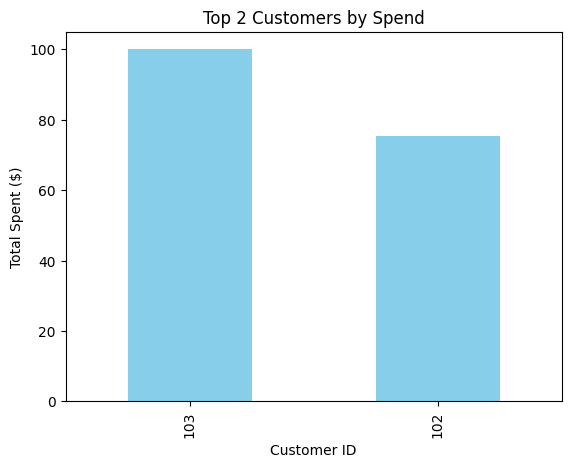

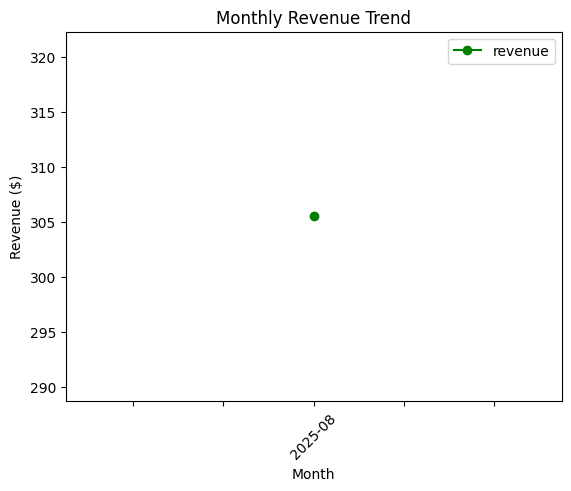

In [ ]:
import matplotlib.pyplot as plt

# 1) Total Revenue - just a single number, so we’ll print it
print("Total Revenue:", total_revenue.iloc[0,0])

# 2) Top 2 Customers by Spend
top_customers.plot(
    x="customer_id",
    y="total_spent",
    kind="bar",
    legend=False,
    title="Top 2 Customers by Spend",
    ylabel="Total Spent ($)",
    xlabel="Customer ID",
    color="skyblue"
)
plt.show()

# 3) Monthly Revenue Trend
if not monthly_revenue.empty:
    monthly_revenue.plot(
        x="month",
        y="revenue",
        kind="line",
        marker="o",
        title="Monthly Revenue Trend",
        ylabel="Revenue ($)",
        xlabel="Month",
        color="green"
    )
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No monthly revenue data available (no dates in your table).")


In [ ]:
import sqlite3

# Connect to DB
conn = sqlite3.connect("data/processed/warehouse.db")
cur = conn.cursor()

# Drop old table if it exists
cur.execute("DROP TABLE IF EXISTS orders;")

# Create new table with an order_date column
cur.execute("""
CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id TEXT,
    amount REAL,
    order_date TEXT
);
""")

# Insert dummy data with different months
cur.executemany("""
INSERT INTO orders (customer_id, amount, order_date) VALUES (?, ?, ?)
""", [
    ("C001", 250.00, "2025-01-15"),
    ("C002", 100.00, "2025-01-20"),
    ("C001", 300.00, "2025-02-05"),
    ("C003", 150.00, "2025-02-10"),
    ("C002", 400.00, "2025-03-01"),
    ("C001", 200.00, "2025-03-15")
]


_IncompleteInputError: incomplete input (2289110759.py, line 30)

In [ ]:
import sqlite3

# Connect to DB
conn = sqlite3.connect("data/processed/warehouse.db")
cur = conn.cursor()

# Drop old table if it exists
cur.execute("DROP TABLE IF EXISTS orders;")

# Create new table with an order_date column
cur.execute("""
CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id TEXT,
    amount REAL,
    order_date TEXT
);
""")

# Insert dummy data with different months
cur.executemany("""
INSERT INTO orders (customer_id, amount, order_date) VALUES (?, ?, ?)
""", [
    ("C001", 250.00, "2025-01-15"),
    ("C002", 100.00, "2025-01-20"),
    ("C001", 300.00, "2025-02-05"),
    ("C003", 150.00, "2025-02-10"),
    ("C002", 400.00, "2025-03-01"),
    ("C001", 200.00, "2025-03-15")
])

conn.commit()
conn.close()

print("✅ Orders table recreated with dummy dates")


✅ Orders table recreated with dummy dates


     month  revenue
0  2025-01    350.0
1  2025-02    450.0
2  2025-03    600.0


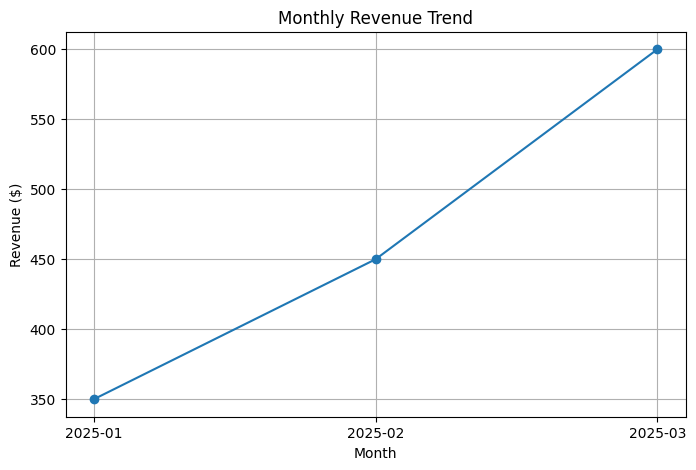

In [42]:
import matplotlib.pyplot as plt

# Query monthly revenue
monthly = pd.read_sql("""
    SELECT strftime('%Y-%m', order_date) AS month,
           SUM(amount) AS revenue
    FROM orders
    GROUP BY month
    ORDER BY month;
""", conn)

# Show table
print(monthly)

# Plot chart
plt.figure(figsize=(8,5))
plt.plot(monthly['month'], monthly['revenue'], marker='o', linestyle='-')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()


  customer_id  num_orders  total_spent
0        C001           3        750.0
1        C002           2        500.0
2        C003           1        150.0


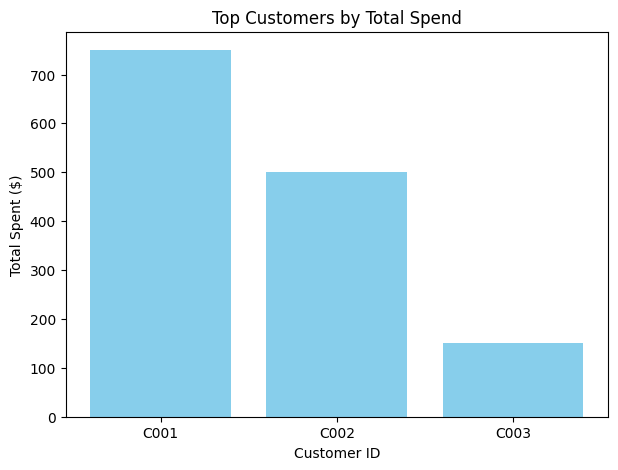

In [43]:
# Query total spend per customer
top_customers = pd.read_sql("""
    SELECT customer_id,
           COUNT(*) AS num_orders,
           SUM(amount) AS total_spent
    FROM orders
    GROUP BY customer_id
    ORDER BY total_spent DESC;
""", conn)

# Show table
print(top_customers)

# Plot chart
plt.figure(figsize=(7,5))
plt.bar(top_customers['customer_id'], top_customers['total_spent'], color="skyblue")
plt.title("Top Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.show()


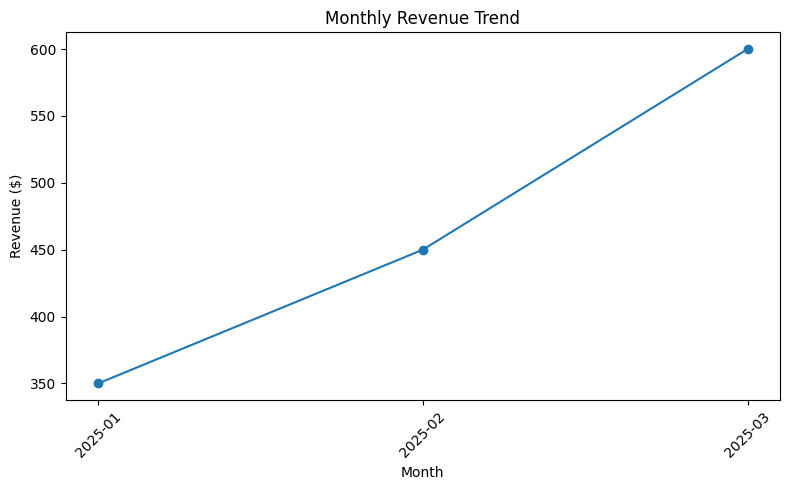

In [44]:
from pathlib import Path
Path("reports").mkdir(parents=True, exist_ok=True)

# Monthly revenue trend (use the same fig you create for the line chart)
plt.figure(figsize=(8,5))
plt.plot(monthly['month'], monthly['revenue'], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("reports/monthly_revenue.png", dpi=200)  # <-- add this
plt.show()


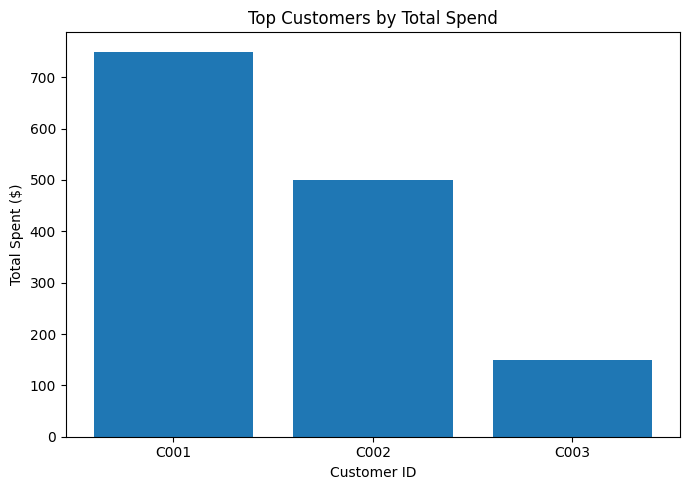

In [45]:
# Top customers bar chart (after computing `top_customers`)
plt.figure(figsize=(7,5))
plt.bar(top_customers['customer_id'], top_customers['total_spent'])
plt.title("Top Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.savefig("reports/top_customers.png", dpi=200)    # <-- add this
plt.show()


In [47]:
from pathlib import Path

reports_dir = Path("reports")
reports_dir.mkdir(exist_ok=True)

summary_md = f"""# SQL Analytics — Mini Report

**Dataset:** `orders` (SQLite)

## Monthly Revenue Trend
![Monthly Revenue](monthly_revenue.png)

- Months covered: **{monthly['month'].min()} → {monthly['month'].max()}**
- Total revenue: **${monthly['revenue'].sum():,.2f}**
- Peak month: **{monthly.loc[monthly['revenue'].idxmax(), 'month']}** with **${monthly['revenue'].max():,.2f}**

## Top Customers by Spend
![Top Customers](top_customers.png)

{top_customers.assign(total_spent=top_customers['total_spent'].map('${:,.2f}'.format)).to_markdown(index=False)}

---

*Generated from `02-sql-analytics/analytics.ipynb`*
"""

(reports_dir / "analytics_report.md").write_text(summary_md, encoding="utf-8")
print("Wrote reports/analytics_report.md")


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [48]:
import sys
!{sys.executable} -m pip install tabulate


In [49]:
{top_customers.assign(total_spent=top_customers['total_spent'].map('${:,.2f}'.format)).to_markdown(index=False)}


{'| customer_id   |   num_orders | total_spent   |\n|:--------------|-------------:|:--------------|\n| C001          |            3 | $750.00       |\n| C002          |            2 | $500.00       |\n| C003          |            1 | $150.00       |'}

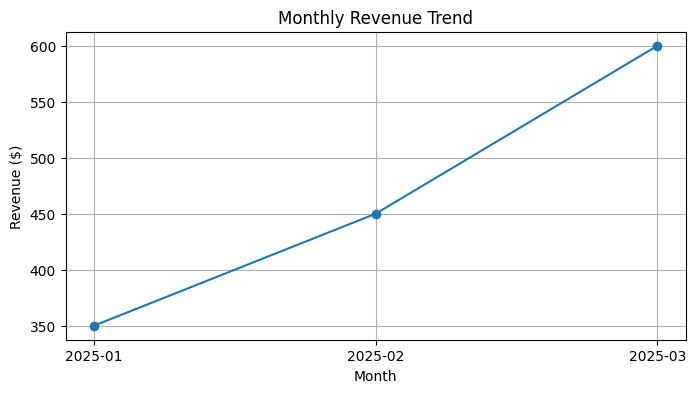

In [51]:
import matplotlib.pyplot as plt

# Query monthly revenue again
monthly = pd.read_sql("""
    SELECT strftime('%Y-%m', order_date) AS month,
           SUM(amount) AS revenue
    FROM orders
    GROUP BY month
    ORDER BY month;
""", conn)

# Plot
plt.figure(figsize=(8,4))
plt.plot(monthly['month'], monthly['revenue'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()
